<a href="https://colab.research.google.com/github/Osterne/codes_book/blob/main/05_mod_01_ap_sup_regressao_05_mlg_contagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

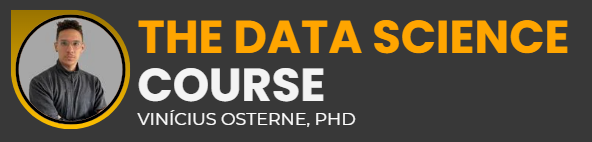

---

# Aprendizado Supervisionado - Modelos Baseados em Regressão

### Modelos Lineares Generalizados - Modelos para Dados de Contagem

---
<br><br><br><br><br>

---

## 🚦 Motivação e Contexto

- 🔢 Exemplos de dados de contagem:  
  - 🚗 Número de acidentes de trânsito  
  - ☎️ Chamadas em call center  
  - 👨‍👩‍👧 Número de filhos por família  
  - 🏭 Falhas em máquinas industriais  

- ⚠️ Problemas da Regressão Linear Tradicional:  
  - ❌ Pode gerar **predições negativas** (impossível para contagens).  
  - 📉 Assume **variância constante**, mas nos dados de contagem a variância cresce com a média.  

> 💡 **Motivação**: Precisamos de modelos que respeitem a natureza dos dados de contagem.  

<br><br><br>

---

## 🧩 Estrutura Geral dos Modelos Lineares Generalizados (MLG) para Poisson

Um MLG é definido a partir de **três componentes principais**:

<br>

### 🎲 1. Componente Aleatório
- Especifica a **distribuição da variável resposta** dentro da família exponencial:  
  $$
  Y_i \sim \text{Família Exponencial}
  $$
- No caso da Regressão Poisson:  
  $$
  Y_i \sim \text{Poisson}(\mu_i)
  $$
  com $\mathbb{E}[Y_i] = \mu_i$ e $\text{Var}(Y_i) = \mu_i$.

<br>

### 📊 2. Componente Sistemático
- Representa a **combinação linear dos preditores**:  
  $$
  \eta_i = \mathbf{x}_i^\top \boldsymbol{\beta}
  $$
- No caso da Poisson, a estrutura é a mesma.

<br>

### 🔗 3. Função de Ligação
- Conecta a média $\mu_i$ ao previsor linear $\eta_i$:  
  $$
  g(\mu_i) = \eta_i
  $$
- Na Poisson, a ligação usual é a **logarítmica**:  
  $$
  \log(\mu_i) = \mathbf{x}_i^\top \boldsymbol{\beta}
  $$
- É possível usar outras ligações:  

| Ligação        | Fórmula            | Observações |
|----------------|--------------------|-------------|
| 🔑 **Log (canônica)** | $g(\mu) = \log(\mu)$ | Mais usada; garante $\mu > 0$; interpretação em termos de razão de taxas. |
| ➡️ **Identidade** | $g(\mu) = \mu$ | Interpretação direta; risco de $\mu \leq 0$. |
| √ **Raiz quadrada** | $g(\mu) = \sqrt{\mu}$ | Útil em alguns contextos de variância; pouco usada. |
| 🔄 **Inversa** | $g(\mu) = 1/\mu$ | Pouco comum; interpretação difícil. |

<br>

✅ **Resumo para a Regressão de Poisson**  
- **Aleatório**: $Y_i \sim \text{Poisson}(\mu_i)$  
- **Sistemático**: $\eta_i = \mathbf{x}_i^\top \boldsymbol{\beta}$  
- **Ligação**: $\log(\mu_i) = \eta_i$  

<br><br><br>

---

## ⚠️ Limitações da Poisson

- **Overdispersão**:  
  $$
  \text{Var}(Y) > \mathbb{E}[Y]
  $$
  - A Poisson assume média = variância, mas em muitos dados reais a variância é bem maior.  
  - Causas: heterogeneidade não observada, excesso de zeros, dependência entre observações.  

- **Consequências da superdispersão**:  
  - 📉 Erros-padrão subestimados → testes enganosos.  
  - 🎯 Valores de $p$ artificiais → maior risco de falsos positivos.  
  - 🔒 Intervalos de confiança estreitos demais → falsa sensação de precisão.  

- **Exemplos reais**:  
  - 🏥 Internações hospitalares (muitos zeros, poucos com várias internações).  
  - 🚗 Acidentes de trânsito em regiões diferentes (fatores não observados).  
  - 🏭 Defeitos em produtos (diferenças entre lotes/máquinas).  

- **Alternativas para lidar com a superdispersão**:  
  - 📈 Regressão **Binomial Negativa** (inclui parâmetro de dispersão).  
  - ⚖️ Modelos **quasi-Poisson** (ajustam variância, mantêm média).  
  - 0️⃣ Modelos com **inflação de zeros** (ZIP, ZINB) quando há zeros extras.  

<br><br><br>

---

## 🔍 Comparações e Critérios de Escolha

- **Diagnóstico de overdispersão**:  
  - 📊 **Estatística de Pearson**: razão qui-quadrado de Pearson / GL → ≈ 1 se adequado; ≫ 1 indica overdispersão.  
  - 📊 **Deviance / GL**: mesmo raciocínio; valores altos indicam ajuste ruim da Poisson.  

- **Critérios de informação (AIC, BIC)**:  
  - Usados para comparar modelos.  
  - Quanto **menor o AIC ou BIC**, melhor o ajuste penalizado pela complexidade.  

- **Regras práticas**:  
  - ✔️ **Poisson**: quando $\text{Var}(Y) \approx \mathbb{E}[Y]$.  
  - ✔️ **Binomial Negativa**: quando há overdispersão clara.  
  - ✔️ **Quasi-Poisson**: útil para corrigir erros-padrão sem alterar a média.  
  - ✔️ **Zero-inflated (ZIP/ZINB)**: quando há excesso de zeros nos dados.  

<br><br><br>

---

## 🔍 Aplicação
- Pacotes necessários
- Carregamento dos dados
- Estatística Descritiva
- Ajuste do Modelo
- Interpretação dos resultados
- Dignóstico do ajuste (incluindo checagem de sobre dispersão)

### Aplicação 1 — Poisson tende a funcionar bem (Insurance – MASS)

In [33]:
# ----------------------------------------------------
# 1. Pacotes necessários
# ----------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [34]:
# ----------------------------------------------------
# 2. Carregamento dos dados
# ----------------------------------------------------
# Conjunto Insurance (MASS): contagem de sinistros com exposição e fatores
dados = sm.datasets.get_rdataset("Insurance", package="MASS").data

# Renomear colunas para português
dados = dados.rename(columns={
    "Claims":   "Sinistros",   # Contagem de sinistros observados (número de ocorrências do evento)
    "Holders":  "Exposicao",   # Exposição ao risco (nº de segurados/apólices na célula)
    "Group":    "Grupo",       # Categoria de grupo do segurado (níveis de risco/volume)
    "Age":      "Idade",       # Faixa etária do segurado
    "District": "Distrito"     # Região / distrito (1 a 4)
})

# Garantir tipos categóricos
dados["Grupo"] = dados["Grupo"].astype("category")
dados["Idade"] = dados["Idade"].astype("category")
dados["Distrito"] = dados["Distrito"].astype("category")

dados.head(4)

,Distrito,Grupo,Idade,Exposicao,Sinistros
0,1,<1l,<25,197,38
1,1,<1l,25-29,264,35
2,1,<1l,30-35,246,20
3,1,<1l,>35,1680,156


In [35]:
# Grupo (categorias de risco baseadas na potência do carro – litros cúbicos do motor)
# Grupo[<1l]     -> carros com motor menor que 1 litro
# Grupo[1-1.5l]  -> carros com motor entre 1 e 1.5 litros
# Grupo[1.5-2l]  -> carros com motor entre 1.5 e 2 litros
# Grupo[>2l]     -> carros com motor acima de 2 litros

# Idade (faixa etária do segurado)
# Idade[<25]     -> segurados com menos de 25 anos
# Idade[25-29]   -> segurados entre 25 e 29 anos
# Idade[30-35]   -> segurados entre 30 e 35 anos
# Idade[>35]     -> segurados com mais de 35 anos

# Distrito (região onde o segurado está registrado)
# Distrito[1]    -> distrito de referência (categoria base do modelo)
# Distrito[2]    -> segurados do distrito 2
# Distrito[3]    -> segurados do distrito 3
# Distrito[4]    -> segurados do distrito 4

# Outras variáveis do dataset
# Exposicao        -> número de segurados (exposição ao risco) -> nao vamos usar nesse momento!
# Sinistros         -> número de sinistros registrados (variável resposta)

        Sinistros    Exposicao
count   64.000000    64.000000
mean    49.234375   364.984375
std     71.162399   622.770601
min      0.000000     3.000000
25%      9.500000    46.750000
50%     22.000000   136.000000
75%     55.500000   327.500000
max    400.000000  3582.000000
Média(Sinistros)=49.234 | Variância(Sinistros)=5064.087


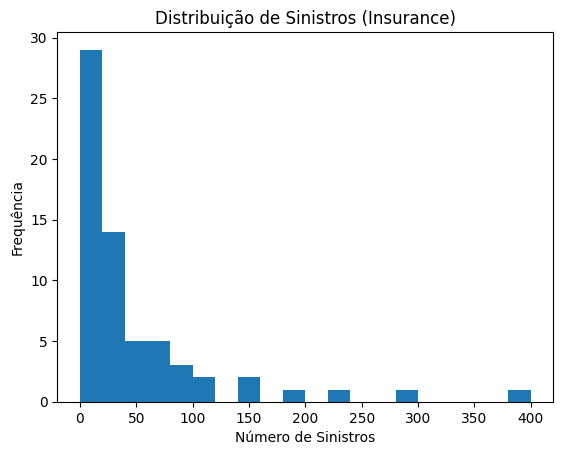

In [52]:
# ----------------------------------------------------
# 3. Estatística Descritiva
# ----------------------------------------------------
print(dados[["Sinistros","Exposicao"]].describe())

# Média vs variância (contagem bruta)
media_y = dados["Sinistros"].mean()
variancia_y = dados["Sinistros"].var()
print(f"Média(Sinistros)={media_y:.3f} | Variância(Sinistros)={variancia_y:.3f}")

# Distribuição dos sinistros
plt.figure()
plt.hist(dados["Sinistros"], bins=20)
plt.title("Distribuição de Sinistros (Insurance)")
plt.xlabel("Número de Sinistros")
plt.ylabel("Frequência")
plt.show()

In [37]:
# ----------------------------------------------------
# 4. Ajuste do Modelo (Poisson)
# ----------------------------------------------------
formula = "Sinistros ~ Grupo + Idade + Distrito"
modelo_poisson = smf.glm(
    formula=formula,
    data=dados,
    family=sm.families.Poisson()
).fit()

print(modelo_poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Sinistros   No. Observations:                   64
Model:                            GLM   Df Residuals:                       54
Model Family:                 Poisson   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -219.32
Date:                Thu, 21 Aug 2025   Deviance:                       121.31
Time:                        21:08:06   Pearson chi2:                     125.
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.4003      0.057     

In [38]:
# ----------------------------------------------------
# 5. Interpretação dos resultados
# ----------------------------------------------------

# O modelo de Poisson/contagem é ajustado na escala logarítmica: log(E[Y]) = Xβ

# Cada coeficiente β representa a variação no log da taxa de sinistros.

# Para interpretar de forma mais intuitiva (chance relativa), aplicamos: IRR = exp(β)

# Regra prática:
## - β > 0 -> IRR > 1 -> aumenta o risco
## - β < 0 -> IRR < 1 -> diminui o risco
## - β ≈ 0 -> IRR ≈ 1 -> efeito nulo

# Para o nosso exemplo
params = modelo_poisson.params
conf = modelo_poisson.conf_int()
irr = np.exp(params)                 # Razão de Taxas (IRR)
irr_ci = np.exp(conf)                # Intervalos de confiança para IRR
tabela_resultados = pd.DataFrame({
    "Coeficiente": params,
    "IRR": irr,
    "IC_inferior": irr_ci[0],
    "IC_superior": irr_ci[1]
})
print("\nCoeficientes e Razões de Taxa (IRR):")
print(tabela_resultados)


Coeficientes e Razões de Taxa (IRR):
                 Coeficiente        IRR  IC_inferior  IC_superior
Intercept           4.400347  81.479103    72.859842    91.118016
Grupo[T.1.5-2l]    -0.518904   0.595172     0.547075     0.647498
Grupo[T.<1l]       -0.989603   0.371724     0.336728     0.410357
Grupo[T.>2l]       -1.578875   0.206207     0.182070     0.233543
Idade[T.30-35]      0.114477   1.121287     0.980547     1.282228
Idade[T.<25]       -0.567693   0.566832     0.481998     0.666596
Idade[T.>35]        1.631471   5.111386     4.594436     5.686502
Distrito[T.2]      -0.438219   0.645185     0.593072     0.701876
Distrito[T.3]      -0.915205   0.400434     0.362824     0.441943
Distrito[T.4]      -1.443666   0.236061     0.209223     0.266341


In [39]:
# ----------------------------------------------------
# Interpretação dos coeficientes e razões de taxa (IRR)
# ----------------------------------------------------

## Intercepto: Representa a taxa de sinistros na categoria de referência (Grupo = referência, Idade = referência, Distrito = referência). IRR = 81.48 (IC95%: 72.86 – 91.12)

# Grupo[T.1.5-2l]: Carros com motor entre 1.5 e 2 litros têm 41% menos chance de sinistro comparados à categoria de referência do grupo. IRR = 0.595 (IC95%: 0.547 – 0.648)
# Grupo[T.<1l]: Carros com motor menor que 1 litro têm 62.8% menos chance de sinistro em relação à categoria de referência. IRR = 0.372 (IC95%: 0.337 – 0.410)
# Grupo[T.>2l]: Carros com motor acima de 2 litros têm 79.4% menos chance de sinistro em relação à categoria de referência. IRR = 0.206 (IC95%: 0.182 – 0.234)

# Idade[T.30-35]: Segurados com idade entre 30 e 35 anos têm uma taxa de sinistro 12% maior, mas o intervalo de confiança inclui 1 (não significativo). IRR = 1.121 (IC95%: 0.981 – 1.282)
# Idade[T.<25]: Segurados com menos de 25 anos têm 43% menos chance de sinistro comparados à idade de referência. IRR = 0.567 (IC95%: 0.482 – 0.667)
# Idade[T.>35]: Segurados com mais de 35 anos têm 5 vezes mais chance de sinistro em relação à categoria de referência. IRR = 5.111 (IC95%: 4.594 – 5.687)

# Distrito[T.2]: Segurados do distrito 2 têm 35% menos chance de sinistro em relação ao distrito de referência. IRR = 0.645 (IC95%: 0.593 – 0.702)
# Distrito[T.3]: Segurados do distrito 3 têm 60% menos chance de sinistro em relação ao distrito de referência. IRR = 0.400 (IC95%: 0.363 – 0.442)
# Distrito[T.4]: Segurados do distrito 4 têm 76% menos chance de sinistro em relação ao distrito de referência. IRR = 0.236 (IC95%: 0.209 – 0.266)


*OBS.:* Caso você queira mudar a categoria de referência em uma variável categórica, basta ajustar novamente o modelo fazendo uma simples mudança. Exemplo: quero que *Idade >35* seja a referência, então:

```python
dados["Idade"] = dados["Idade"].cat.reorder_categories(
    [">35", "<25", "25-29", "30-35"], ordered=True
)
# ou
dados["Idade"] = dados["Idade"].cat.set_categories(
    [">35", "<25", "25-29", "30-35"], ordered=False
)
```

In [40]:
# ----------------------------------------------------
# 6. Diagnóstico do ajuste
# ----------------------------------------------------

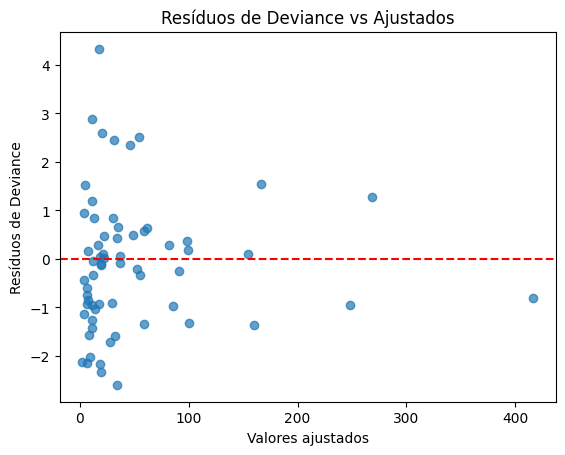

In [41]:
# ----------------------------------------------------
# 6.1 Resíduos de Deviance vs Ajustados
# ----------------------------------------------------
# Gráfico: Resíduos de Deviance vs. valores ajustados
# Objetivo: Avaliar discrepâncias no ajuste e possíveis padrões sistemáticos.
# Comportamento esperado: Nuvem aleatória centrada em 0, sem padrão (faixas, funil, curvatura).
# Desconfie quando: Padrões em U/∩, funil (heterogeneidade), faixas por grupos, muitos pontos com grande magnitude.
residuos_deviance = modelo_poisson.resid_deviance
plt.figure()
plt.scatter(modelo_poisson.fittedvalues, residuos_deviance, alpha=0.7)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel("Valores ajustados")
plt.ylabel("Resíduos de Deviance")
plt.title("Resíduos de Deviance vs Ajustados")
plt.show()


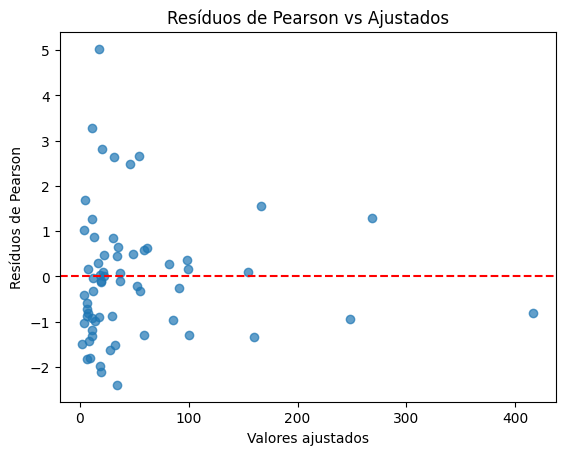

In [42]:
# ----------------------------------------------------
# 6.2 Resíduos de Pearson vs Ajustados
# ----------------------------------------------------
# Gráfico: Resíduos de Pearson vs. valores ajustados
# Objetivo: Checar ajuste geral e indícios de sobredispersão/heterogeneidade.
# Comportamento esperado: Dispersão aleatória ao redor de 0, variância aproximadamente constante.
# Desconfie quando: Abertura em funil, bandas por níveis, muitos outliers verticais.
residuos_pearson = modelo_poisson.resid_pearson
plt.figure()
plt.scatter(modelo_poisson.fittedvalues, residuos_pearson, alpha=0.7)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel("Valores ajustados")
plt.ylabel("Resíduos de Pearson")
plt.title("Resíduos de Pearson vs Ajustados")
plt.show()


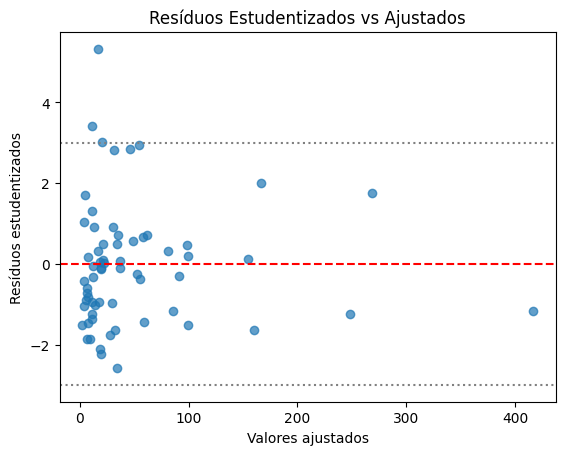

In [43]:
# ----------------------------------------------------
# 6.3 Resíduos Estudentizados (Pearson) vs Ajustados
# ----------------------------------------------------
# Gráfico: Resíduos estudentizados vs. valores ajustados
# Objetivo: Identificar outliers mais claramente (padronização por variância).
# Comportamento esperado: Maioria dentro de ~[-3, 3], sem padrão com os ajustados.
# Desconfie quando: Muitos pontos além de ±3, padrões sistemáticos ou curvatura.
infl = modelo_poisson.get_influence(observed=True)
resid_student = infl.resid_studentized
plt.figure()
plt.scatter(modelo_poisson.fittedvalues, resid_student, alpha=0.7)
plt.axhline(0, color="r", linestyle="--")
plt.axhline(3, color="gray", linestyle=":")
plt.axhline(-3, color="gray", linestyle=":")
plt.xlabel("Valores ajustados")
plt.ylabel("Resíduos estudentizados")
plt.title("Resíduos Estudentizados vs Ajustados")
plt.show()


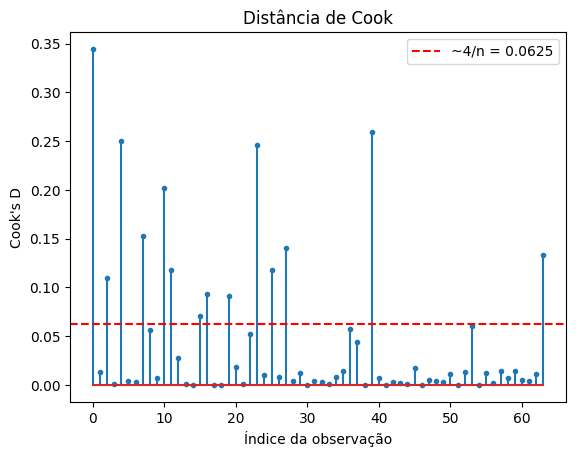

In [44]:
# ----------------------------------------------------
# 6.4 Distância de Cook (influência)
# ----------------------------------------------------
# Gráfico: Stem plot da Distância de Cook
# Objetivo: Detectar observações com grande influência no ajuste do modelo.
# Comportamento esperado: Poucos pontos com Cook's D alto; maioria baixa.
# Desconfie quando: Muitos pontos acima de ~4/n ou alguns extremamente altos.

import numpy as np
infl = modelo_poisson.get_influence(observed=True)
cooks_d = infl.cooks_distance[0]
n = len(cooks_d)
threshold = 4/n

plt.figure()
markerline, stemlines, baseline = plt.stem(np.arange(n), cooks_d)
plt.setp(markerline, markersize=3)
plt.axhline(threshold, color="r", linestyle="--", label=f"~4/n = {threshold:.4f}")
plt.xlabel("Índice da observação")
plt.ylabel("Cook's D")
plt.title("Distância de Cook")
plt.legend()
plt.show()

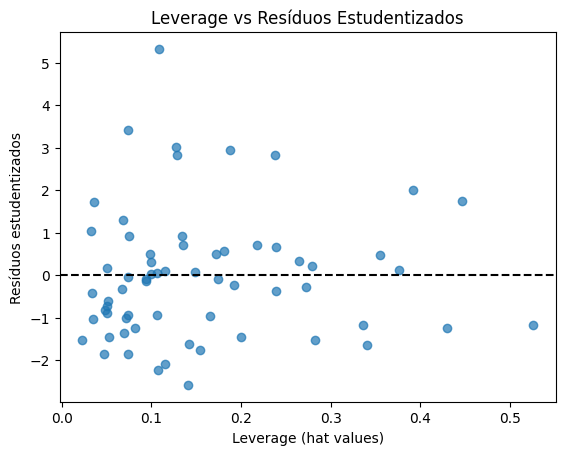

In [45]:
# ----------------------------------------------------
# 6.5 Leverage (valores da diagonal do chapéu) vs Resíduos Estudentizados
# ----------------------------------------------------
# Gráfico: Leverage vs. resíduos estudentizados (plot de influência)
# Objetivo: Ver simultaneamente pontos com alto leverage e grande resíduo.
# Comportamento esperado: Poucos pontos com leverage alto; resíduos próximos de 0.
# Desconfie quando: Pontos com leverage alto e |resíduo| grande (potencialmente influentes).
leverage = infl.hat_matrix_diag
plt.figure()
plt.scatter(leverage, resid_student, alpha=0.7)
plt.axhline(0, color="k", linestyle="--")
plt.xlabel("Leverage (hat values)")
plt.ylabel("Resíduos estudentizados")
plt.title("Leverage vs Resíduos Estudentizados")
plt.show()

<Figure size 640x480 with 0 Axes>

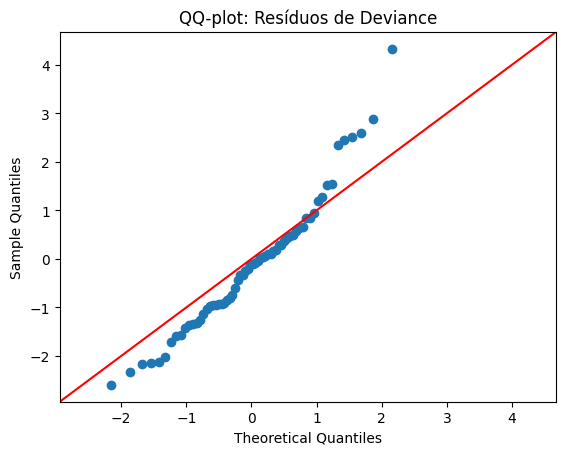

In [46]:
# ----------------------------------------------------
# 6.6 QQ-plot dos Resíduos de Deviance
# ----------------------------------------------------
# Gráfico: QQ-plot dos resíduos de deviance
# Objetivo: Avaliar aproximação à normalidade dos resíduos (para outliers/assimetria).
# Comportamento esperado: Pontos próximos à linha de 45°.
# Desconfie quando: Caudas desviando muito da linha, curvatura acentuada.
import statsmodels.api as sm
plt.figure()
sm.ProbPlot(residuos_deviance).qqplot(line="45")
plt.title("QQ-plot: Resíduos de Deviance")
plt.show()


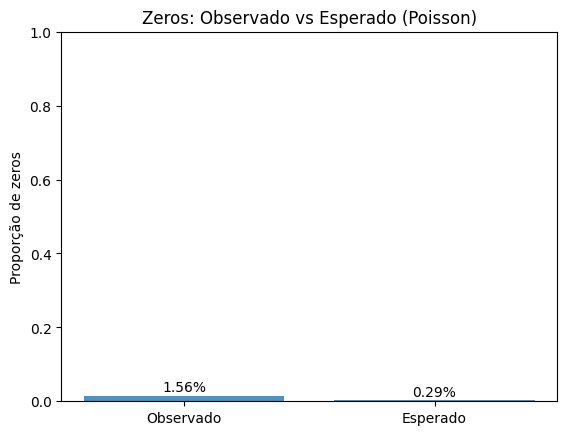

In [47]:
# ----------------------------------------------------
# 6.7 Verificação de excesso de zeros (Zero-Inflation)
# ----------------------------------------------------
# Gráfico: Barras do % de zeros observado vs % de zeros esperado sob Poisson
# Objetivo: Detectar excesso de zeros em relação ao esperado pelo modelo.
# Comportamento esperado: Porcentagens semelhantes (observado ≈ esperado).
# Desconfie quando: Observado >> Esperado (considerar ZIP/ZINB).
y = modelo_poisson.model.endog
mu = modelo_poisson.fittedvalues  # média Poisson ajustada
prop_zeros_obs = np.mean(y == 0)
prop_zeros_exp = np.mean(np.exp(-mu))  # P(Y=0|mu) = exp(-mu)
plt.figure()
plt.bar(["Observado", "Esperado"], [prop_zeros_obs, prop_zeros_exp], alpha=0.8)
plt.ylabel("Proporção de zeros")
plt.title("Zeros: Observado vs Esperado (Poisson)")
for i, v in enumerate([prop_zeros_obs, prop_zeros_exp]):
    plt.text(i, v + 0.01, f"{v:.2%}", ha='center')
plt.ylim(0, 1)
plt.show()


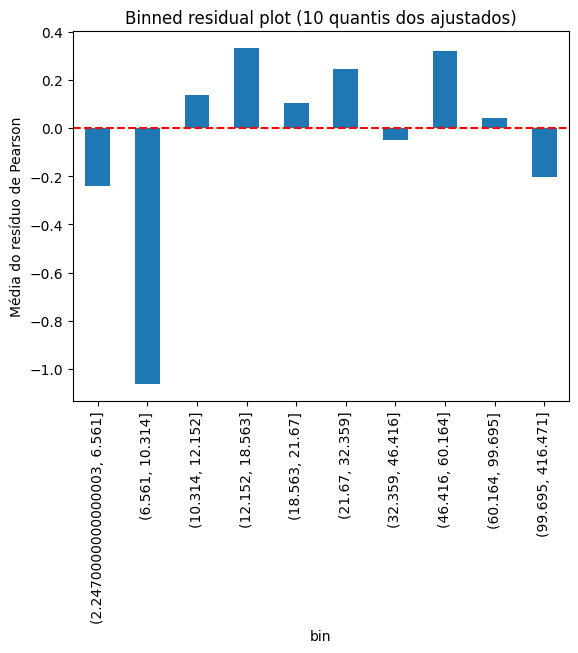

In [48]:
# ----------------------------------------------------
# 6.8 Resíduo binned (média por faixas de ajuste)
# ----------------------------------------------------
# Gráfico: Média do resíduo de Pearson por bins (quantis) dos valores ajustados
# Objetivo: Detectar viés sistemático ao longo da escala de predição.
# Comportamento esperado: Médias próximas de 0 em todos os bins.
# Desconfie quando: Tendências crescentes/decrescentes ou desvios persistentes de 0.
import pandas as pd
k = 10  # número de bins (decis)
df_res = pd.DataFrame({
    "fitted": modelo_poisson.fittedvalues,
    "resid_pearson": residuos_pearson
})
df_res["bin"] = pd.qcut(df_res["fitted"], q=k, duplicates="drop")
bin_mean = df_res.groupby("bin", observed=False)["resid_pearson"].mean()
plt.figure()
bin_mean.plot(kind="bar")
plt.axhline(0, color="r", linestyle="--")
plt.ylabel("Média do resíduo de Pearson")
plt.title("Binned residual plot (10 quantis dos ajustados)")
plt.show()


In [49]:
# ----------------------------------------------------
# 6.9 Dispersão (Qui-quadrado de Pearson / GL) — métrica numérica
# ----------------------------------------------------
# Métrica (sem gráfico): Dispersão = sum(res_pearson^2) / df_resid
# Objetivo: Checar sobredispersão global (>> 1 sugere Quasi-Poisson/NegBin).
# Comportamento esperado: ~1 (ou não muito > 1).
# Desconfie quando: >> 1 (sobredispersão), << 1 (subdispersão).
qui2_pearson = np.sum(residuos_pearson**2)
dispersao = qui2_pearson / modelo_poisson.df_resid
print(f"Dispersão (Qui2 de Pearson / GL) = {dispersao:.3f}")


Dispersão (Qui2 de Pearson / GL) = 2.318


In [50]:
# ----------------------------------------------------
# 6.10 Critérios de informação — comparação de modelos (sem gráfico)
# ----------------------------------------------------
# Métrica (sem gráfico): AIC/BIC
# Objetivo: Comparar especificações (Poisson vs Quasi-Poisson/NegBin/GAM etc.).
# Comportamento esperado: Modelos melhores tendem a ter AIC/BIC menores.
# Desconfie quando: AIC/BIC muito menores em outro modelo => reespecificar.
print(f"AIC = {modelo_poisson.aic:.2f}")
try:
    print(f"BIC = {modelo_poisson.bic:.2f}")
except Exception:
    pass  # nem todos os resultados possuem BIC


AIC = 458.63
BIC = -103.27


/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(



Dispersão (Qui2 de Pearson / GL) = 2.318


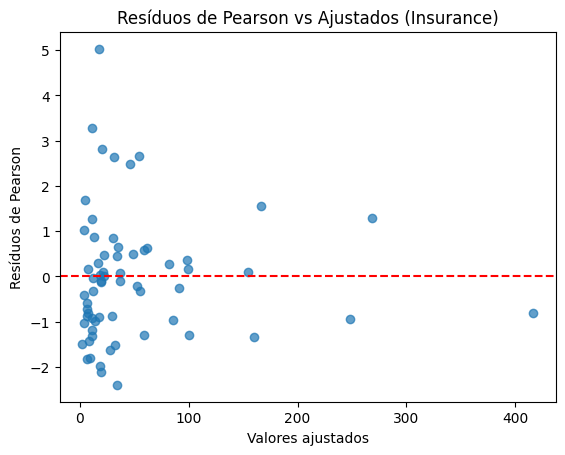

In [51]:
# ----------------------------------------------------
# 6. Diagnóstico do ajuste (sobredispersão)
# ----------------------------------------------------
# Gráfico: Resíduos de Pearson vs. valores ajustados
# Objetivo: Verificar ajuste geral e indícios de sobredispersão/heterogeneidade.
# Comportamento esperado: Nuvem aleatória centrada em 0, sem padrão (sem funil/curvatura).
# Desconfie quando: Abertura em funil, faixas por grupos, muitos outliers verticais/laterais.

residuos_pearson = modelo_poisson.resid_pearson

# Métrica numérica de sobredispersão
# Objetivo: Quantificar sobredispersão via Qui-quadrado de Pearson por gl.
# Comportamento esperado: Dispersão ≈ 1 (ou não muito > 1) para Poisson adequado.
# Desconfie quando: Dispersão >> 1 (sobredispersão) ou << 1 (subdispersão).
qui2_pearson = np.sum(residuos_pearson**2)
dispersao = qui2_pearson / modelo_poisson.df_resid
print(f"\nDispersão (Qui2 de Pearson / GL) = {dispersao:.3f}")

# Plot dos resíduos de Pearson
plt.figure()
plt.scatter(modelo_poisson.fittedvalues, residuos_pearson, alpha=0.7)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel("Valores ajustados")
plt.ylabel("Resíduos de Pearson")
plt.title("Resíduos de Pearson vs Ajustados (Insurance)")
plt.show()

# Regra prática:
# - Se dispersão ~ 1 (ou não muito > 1), Poisson é adequado.
# - Se >> 1, considerar Quasi-Poisson, Binomial Negativa ou reavaliar especificação (variáveis/offset).
